
**Name-** Kore Pratiksha Jayant

**Oasis Infobyte (Data Science)**

**Task-1** Iiris Flower Classification

# 

**INTRODUCTION_** In this notebook, we aim to perform Iris Flower Classification using machine learning techniques, training models on the measurements of iris flowers to accurately predict their species.

# 

# ***Import necessary libraries***

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 

# ***Loading dataset***

In [2]:
data = pd.read_csv('C:\\Users\\stati\\OneDrive\\Desktop\\Iris.csv')
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 

# ***(EDA) Exploratory Data Analysis*** 

In [3]:
# To display column names
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

we can see there are 5 columns 

In [4]:
# To display data types of columns
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
# To display count of each species
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
# To display summary statistics
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# To rename columns for better readability
updated_data = data.rename(columns={'SepalLengthCm':'Sepal_Length',
                                    'SepalWidthCm':'Sepal_Width',
                                    'PetalLengthCm':'Petal_Length',
                                    'PetalWidthCm':'Petal_Width',
                                    'Species':'Species'})
updated_data

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


After getting all the necessary information now we can start plotting are graphs

# ***Visualization***

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

**Visualizing the Relationship between Sepal Length and Petal Length**

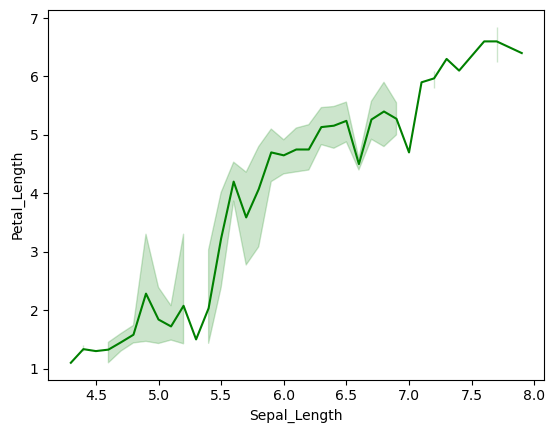

In [9]:
sns.lineplot(x=updated_data["Sepal_Length"], y=updated_data["Petal_Length"], color='Green')
plt.show()

**Visualize pair plots with species differentiation**

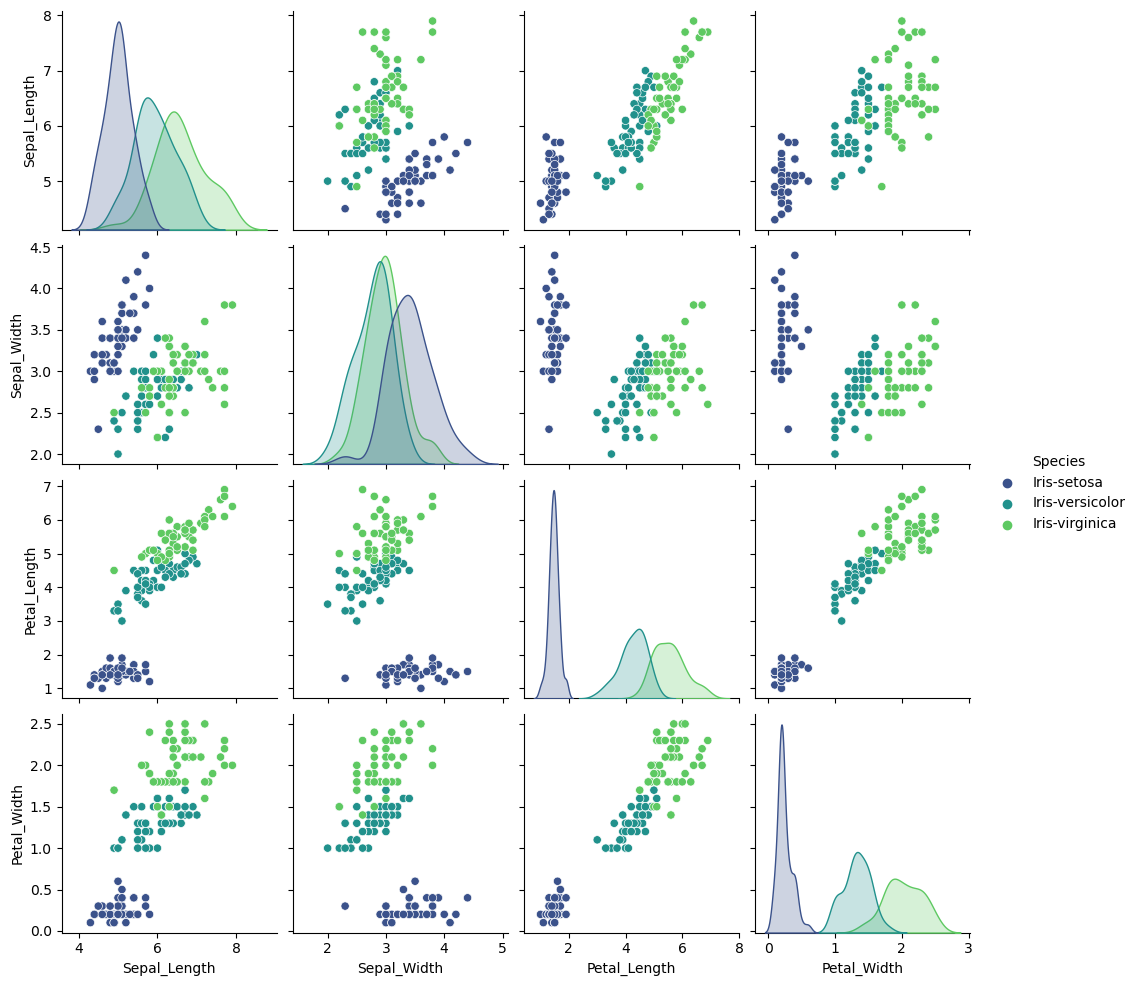

In [10]:
sns.pairplot(updated_data, hue="Species", palette='viridis')
plt.show()

After creating a pair plot for the features, it's evident that the pattern of relationships between different pairs of features for iris-setosa is noticeably unique compared to the other two species. However, there is some overlap in the patterns of relationships between features for iris-versicolor and iris-virginica.

**Visualize Sepal Length vs Sepal Width using scatter plot**

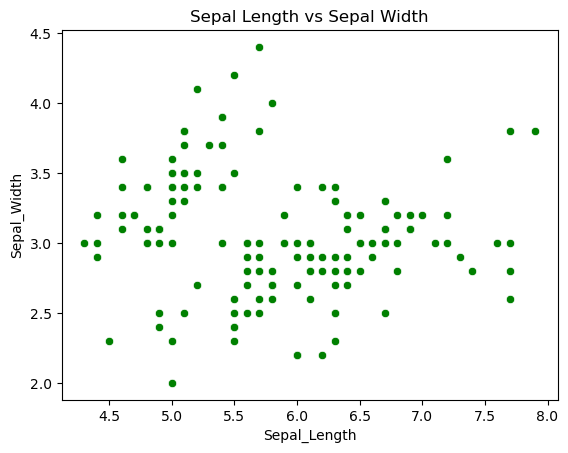

In [11]:
sns.scatterplot(x=updated_data["Sepal_Length"], y=updated_data["Sepal_Width"], color='green')  
plt.title("Sepal Length vs Sepal Width")
plt.show()

**Visualize Sepal Length vs Sepal Width using FacetGrid**

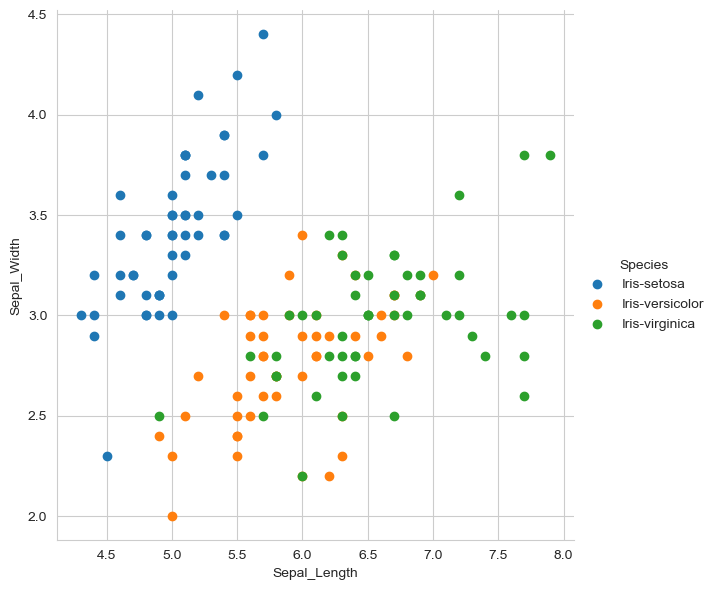

In [12]:
sns.set_style("whitegrid")
sns.FacetGrid(updated_data, hue="Species", height=6) \
    .map(plt.scatter, "Sepal_Length", "Sepal_Width") \
    .add_legend()
plt.show()

**Create histograms for Sepal Length, Petal Length, Sepal Width, and Petal Width**

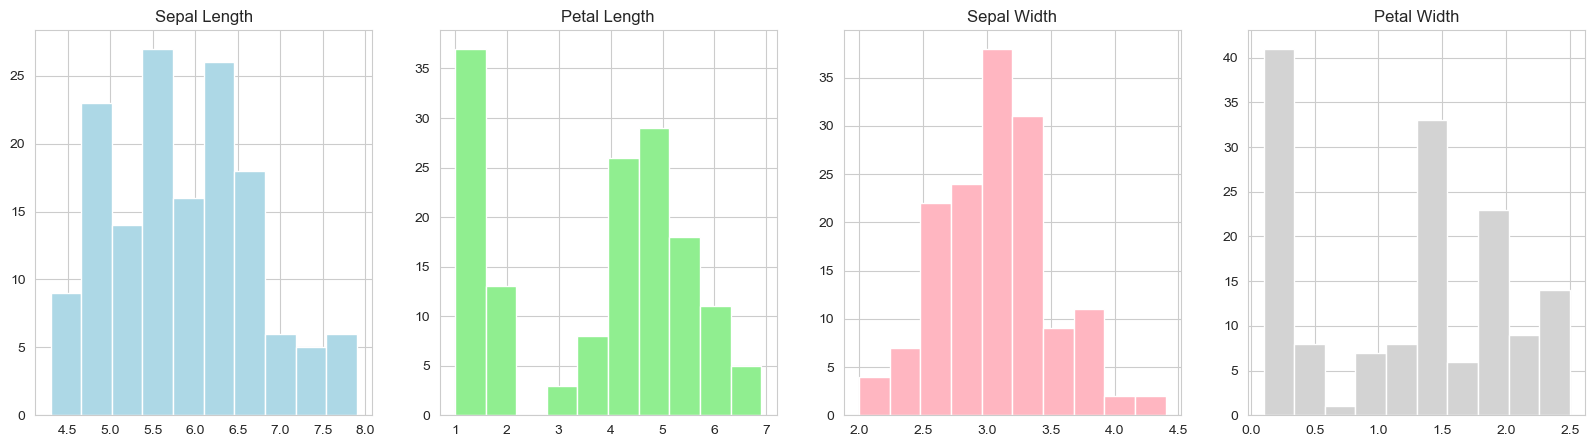

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

updated_data['Sepal_Length'].hist(ax=axes[0], color="lightblue")
axes[0].set_title("Sepal Length")

updated_data['Petal_Length'].hist(ax=axes[1], color="lightgreen")
axes[1].set_title("Petal Length")

updated_data['Sepal_Width'].hist(ax=axes[2], color="lightpink")
axes[2].set_title("Sepal Width")

updated_data['Petal_Width'].hist(ax=axes[3], color="lightgray")
axes[3].set_title("Petal Width")

plt.show()

**Pie chart for Iris Species Classifications**

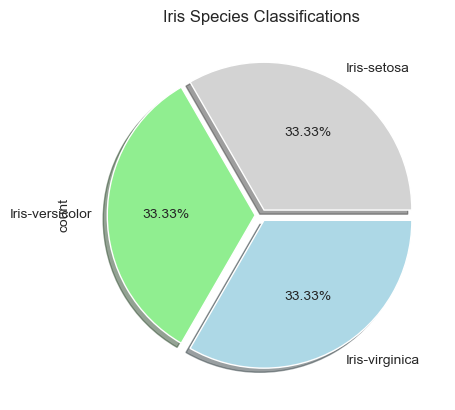

In [14]:
species_counts = updated_data['Species'].value_counts()

species_counts.plot.pie(explode=[0.04, 0.04, 0.04], autopct='%1.2f%%', 
                        colors=["lightgray", "lightgreen", "lightblue"], shadow=True)
plt.title("Iris Species Classifications")
plt.show()


**Creating a Heatmap for the Correlation Matrix Numeric Columns**

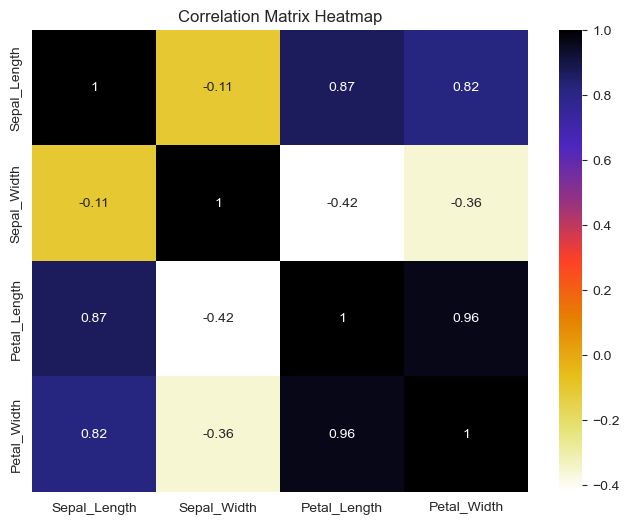

In [15]:
numeric_columns = updated_data.select_dtypes(include=[np.number])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='CMRmap_r')
plt.title("Correlation Matrix Heatmap")
plt.show()


# 

# ***Data Processing***

**Dropping Duplicate Rows and Checking for Duplicates**

In [16]:
updated_data.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", updated_data.shape)
print("Any duplicates remaining:", updated_data.duplicated().any())

Shape after removing duplicates: (147, 5)
Any duplicates remaining: False


**Preprocessing the 'Species' Column for Modeling**

In [17]:
from sklearn import preprocessing

In [18]:
label_encoder = preprocessing.LabelEncoder()
updated_data['Species'] = label_encoder.fit_transform(updated_data['Species'])
updated_data['Species'].unique()

array([0, 1, 2])

Now the value of this species has been converted into array

iris-setosa ==0

iris-versicolor ==1

iris-virginica ==2

In [19]:
updated_data['Species'].head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

# 

# ***Model Training***

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

**Spliting the data into training and testing sets**

In [21]:
x = updated_data.drop(['Species'], axis=1)
y = updated_data['Species']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

**Train Linear Regression model**

In [22]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)  

linear_accuracy = round(linear_model.score(x_test, y_test) * 100, 2)
print("Linear Regression Accuracy: {}%".format(linear_accuracy))


Linear Regression Accuracy: 92.53%


**Train Logistic Regression model**

In [23]:
logistic_model = LogisticRegression(max_iter=130)
logistic_model.fit(x_train, y_train)

logistic_accuracy = round(logistic_model.score(x_test, y_test) * 100, 2)
print("Logistic Regression Accuracy: {}%".format(logistic_accuracy))

Logistic Regression Accuracy: 96.67%


**Train K-Nearest Neighbors (KNN) model**

In [24]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)

knn_accuracy = round(accuracy_score(y_test, knn_model.predict(x_test)) * 100, 2)
print("KNN Accuracy: {}%".format(knn_accuracy))

KNN Accuracy: 96.67%


# 

# ***Model Evaluation***

In [25]:
# Evaluate Linear Regression model
linear_accuracy = round(linear_model.score(x_test, y_test) * 100, 2)
print("Linear Regression Accuracy: {}%".format(linear_accuracy))

# Evaluate Logistic Regression model
logistic_accuracy = round(logistic_model.score(x_test, y_test) * 100, 2)
print("Logistic Regression Accuracy: {}%".format(logistic_accuracy))

# Evaluate K-Nearest Neighbors (KNN) model
knn_accuracy = round(accuracy_score(y_test, knn_model.predict(x_test)) * 100, 2)
print("KNN Accuracy: {}%".format(knn_accuracy))


Linear Regression Accuracy: 92.53%
Logistic Regression Accuracy: 96.67%
KNN Accuracy: 96.67%


*Logistic Regression and K-Nearest Neighbors (KNN) are both highly accurate at 96.67%, making them good choices for classifying iris species based on features. Linear Regression, with 92.53% accuracy, is less suitable for this task. Logistic Regression and KNN exhibit similar performance, providing flexibility in model selection.*

# 

# ***Model Testing***

In [26]:
# Example of new data for testing
X_new = np.array([[5.1, 3.5, 1.4, 0.2], [6.0, 3.0, 4.0, 1.3], [7.3, 2.9, 6.3, 1.8]])

In [27]:
# Testing with KNN model
knn_predictions = knn_model.predict(X_new)
print("KNN Predictions:", knn_predictions)

KNN Predictions: [0 1 2]


In [28]:
# Testing with Logistic Regression model
logistic_predictions = logistic_model.predict(X_new)
print("Logistic Regression Predictions:", logistic_predictions)

Logistic Regression Predictions: [0 1 2]


In [29]:
# Additional example for Logistic Regression
X_new_additional = np.array([[4.6, 3.4, 1.4, 0.3]])
additional_logistic_prediction = logistic_model.predict(X_new_additional)
print("Additional Logistic Regression Prediction:", additional_logistic_prediction)

Additional Logistic Regression Prediction: [0]


# 

iris-setosa ==0

iris-versicolor ==1

iris-virginica ==2

# ***END***